In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
ass = pd.read_csv('data/assessments.csv')
vle = pd.read_csv('data/vle.csv')
stu_vle = pd.read_csv('data/studentVle.csv')
stu_info = pd.read_csv('data/studentInfo.csv')
stu_as = pd.read_csv('data/studentAssessment.csv')
stu_reg = pd.read_csv('data/studentRegistration.csv')
cou = pd.read_csv('data/courses.csv')

In [18]:
courses = cou.groupby(['code_module', 'code_presentation']).sum().index.values
courses

array([('AAA', '2013J'), ('AAA', '2014J'), ('BBB', '2013B'),
       ('BBB', '2013J'), ('BBB', '2014B'), ('BBB', '2014J'),
       ('CCC', '2014B'), ('CCC', '2014J'), ('DDD', '2013B'),
       ('DDD', '2013J'), ('DDD', '2014B'), ('DDD', '2014J'),
       ('EEE', '2013J'), ('EEE', '2014B'), ('EEE', '2014J'),
       ('FFF', '2013B'), ('FFF', '2013J'), ('FFF', '2014B'),
       ('FFF', '2014J'), ('GGG', '2013J'), ('GGG', '2014B'),
       ('GGG', '2014J')], dtype=object)

# Plot all average daily clicks for passing/failing students for all courses

**Important notes:** 

* each graph below is for a different course presentation - meaning, a single graph is not "World History 101" but rather "World History 101 in 2013 First Semester"
* the dashed vertical lines indicate important due dates
* the two lines of differing colors represent the mean of students that ultimately passed the course vs students that ultimately failed the course, as indicated in the legend (1 = Pass, 0 = Fail)

Scrolling through all the courses, it becomes apparent that we are dealing with a good deal of variance in course structures. Interestingly however, there is one visual pattern apparent in the majority: **the click behavior of the failing students is more volatile than the passing students.**

In [43]:
def plot_clk_sum_timeline(stvl, duedates_, name):
    fig, ax = plt.subplots(figsize=(15,7))
    stvl.groupby(['date','final_result']).mean()['sum_click'].unstack().plot(ax=ax)
    for date in duedates_:
        ax.axvline(x=date, color='y', linestyle='--')
    ax.set_title('Avg Daily Click Sum - Students Who Passed vs Who Failed - ' + name)
    plt.show();

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


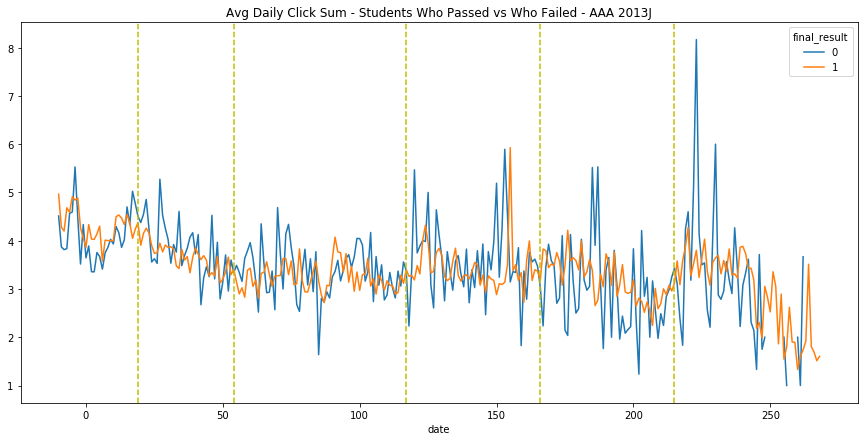

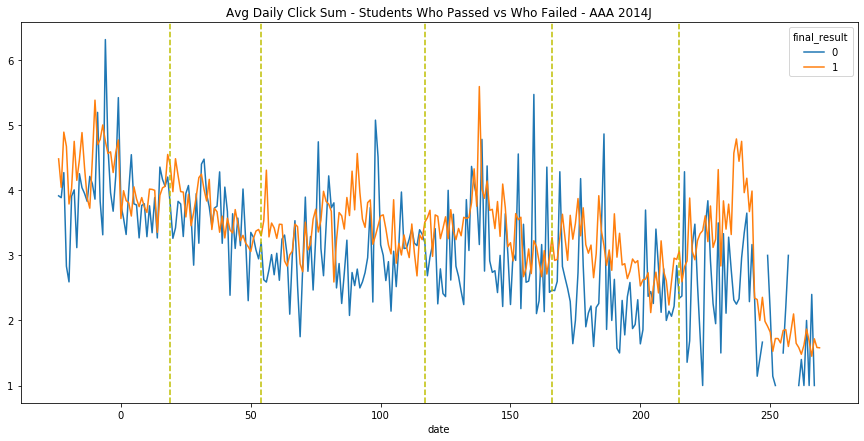

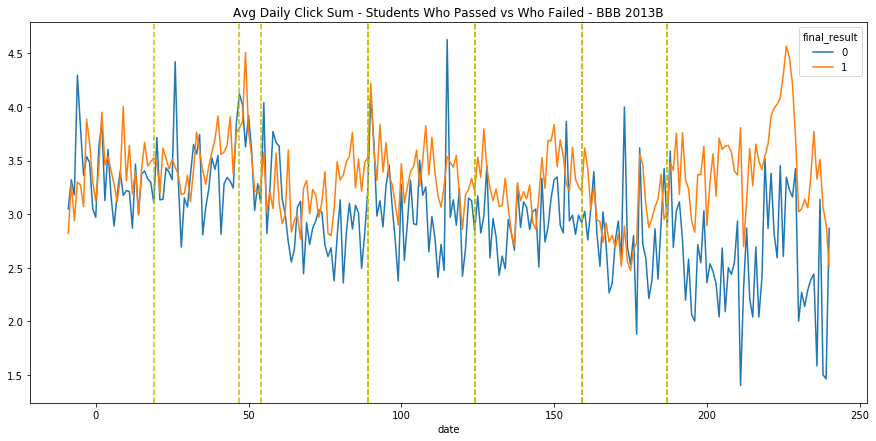

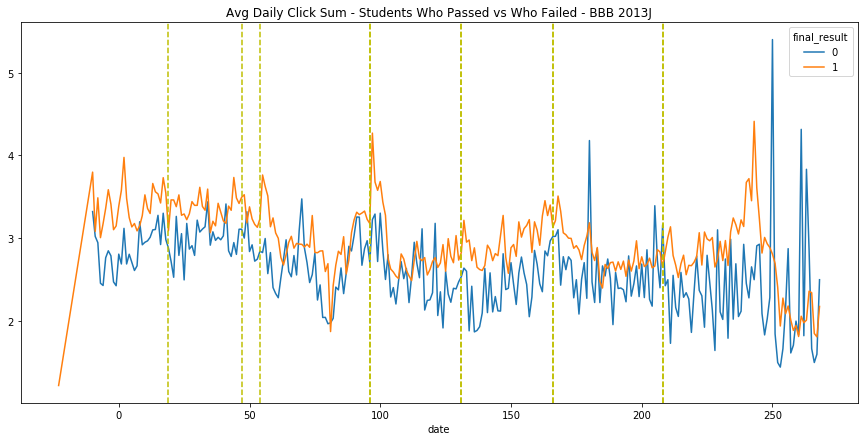

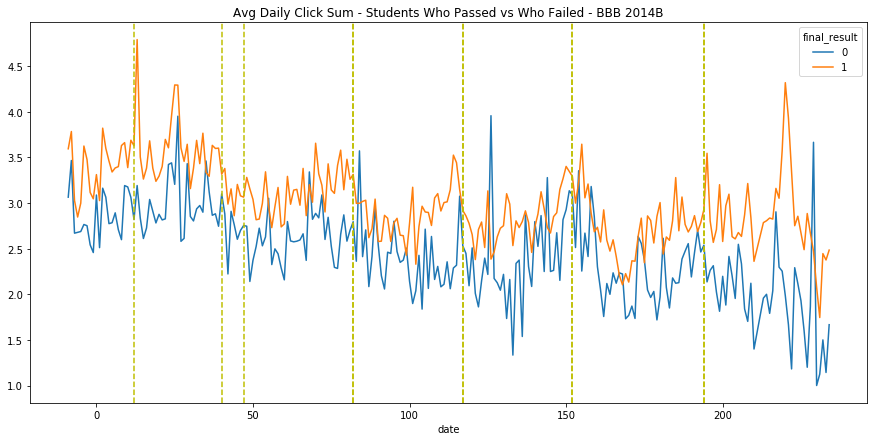

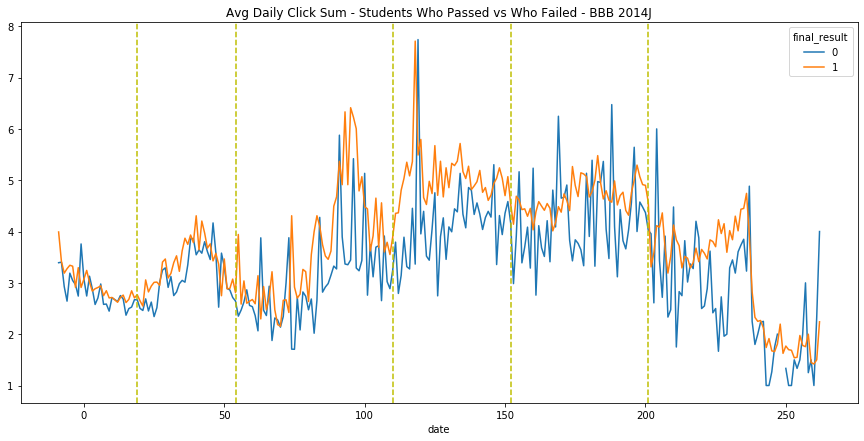

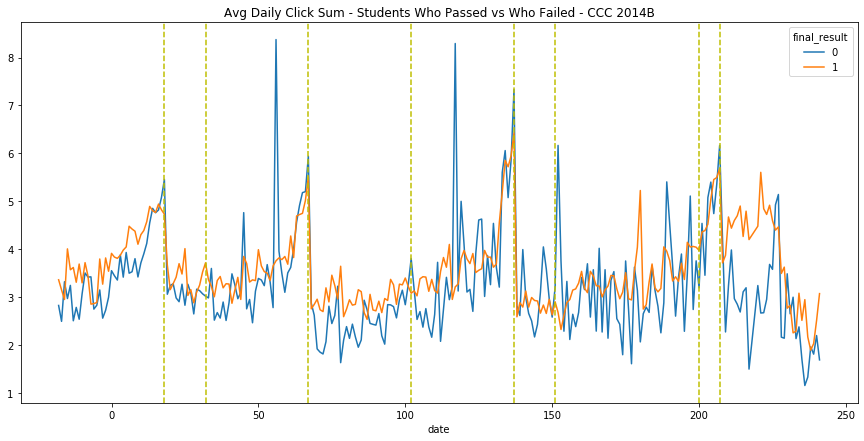

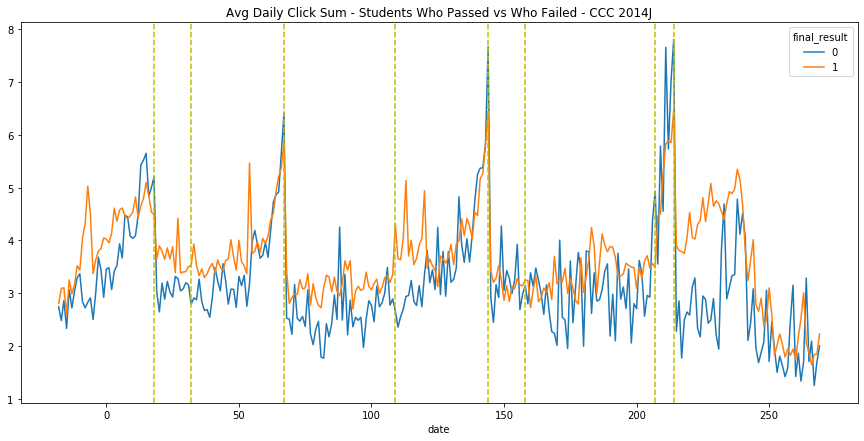

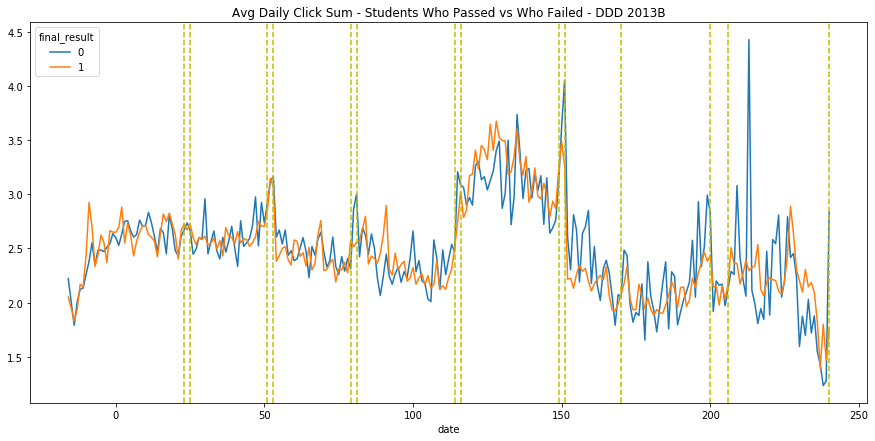

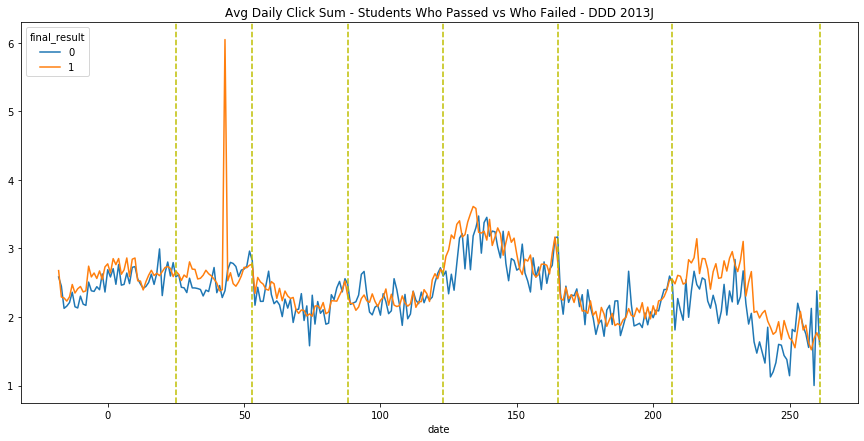

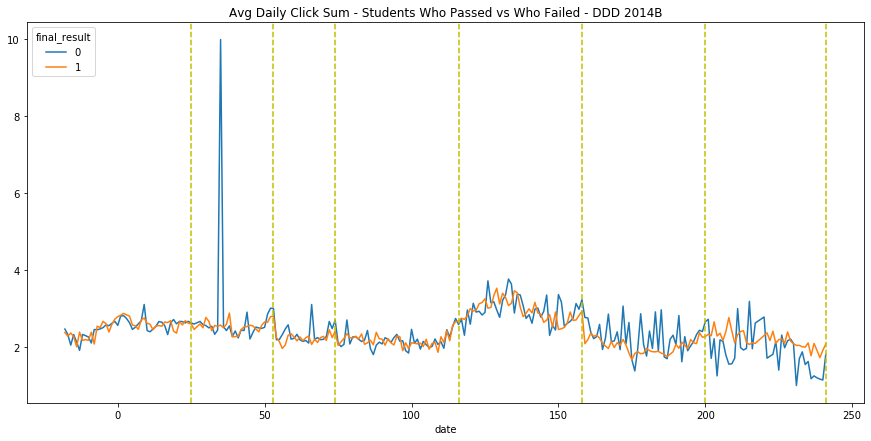

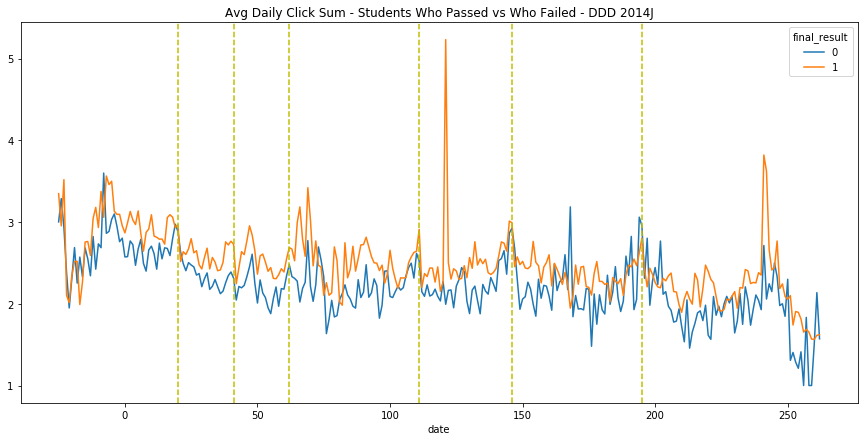

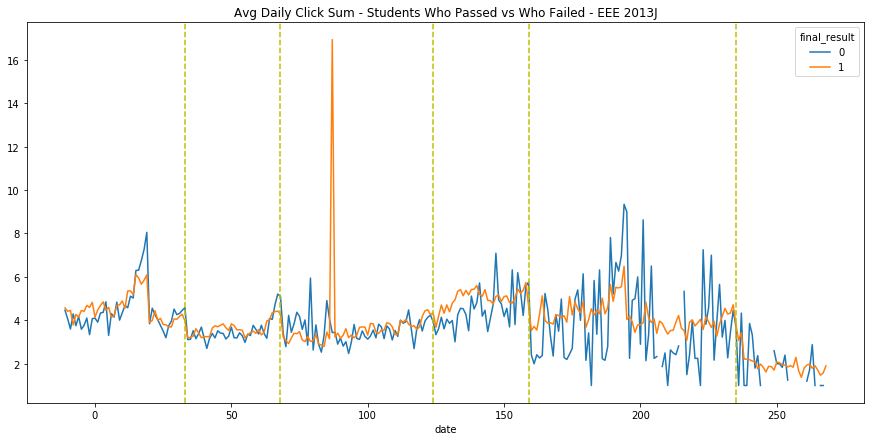

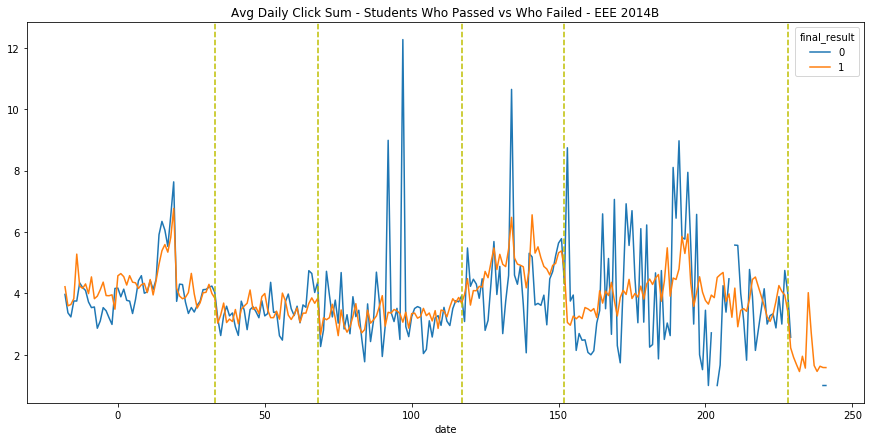

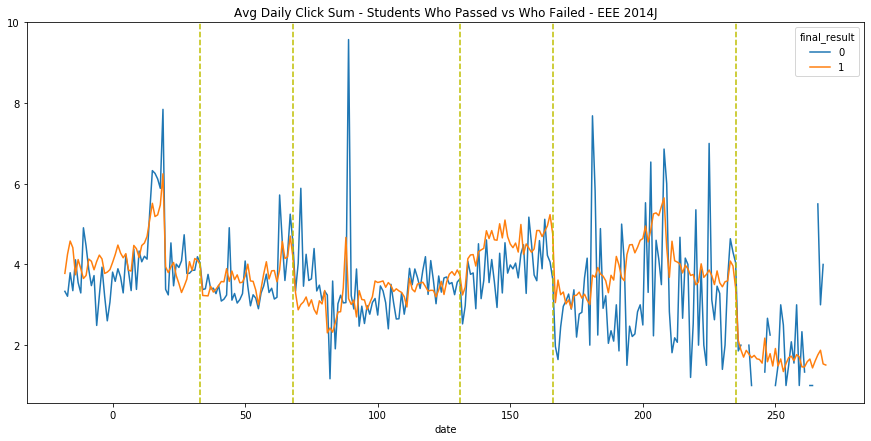

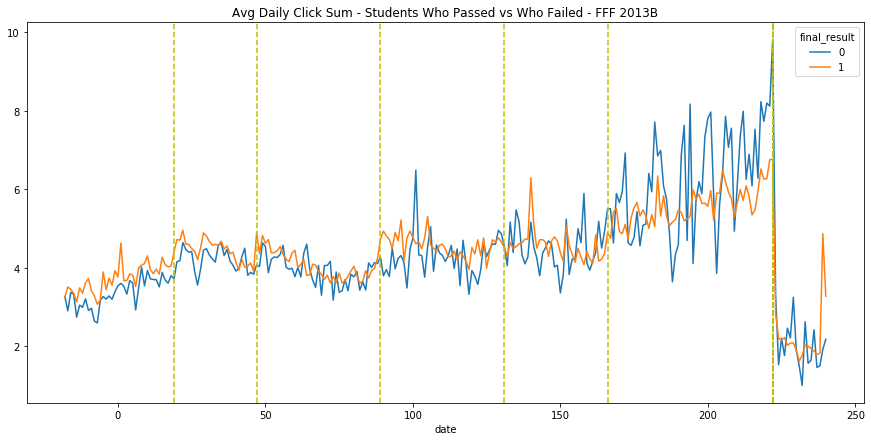

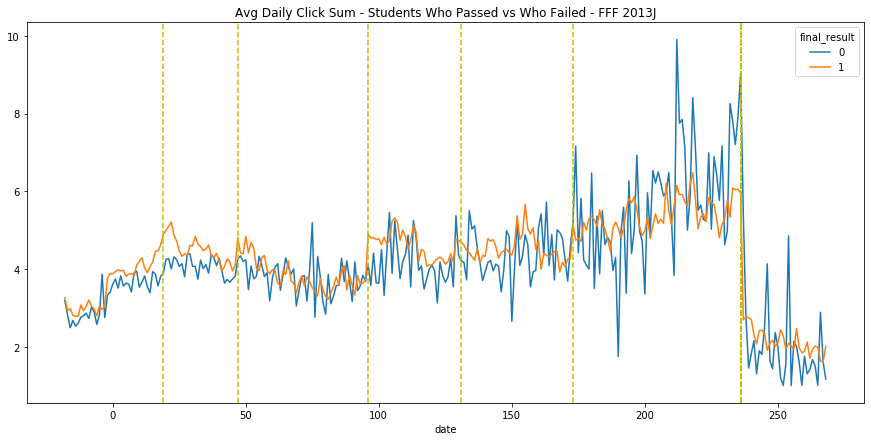

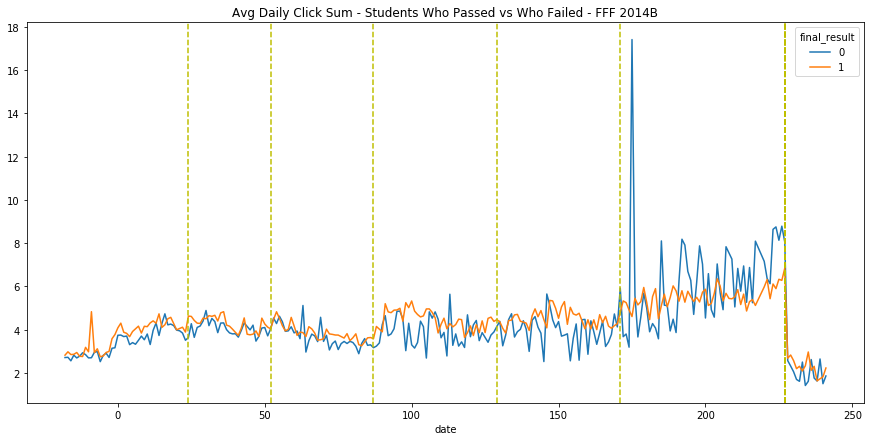

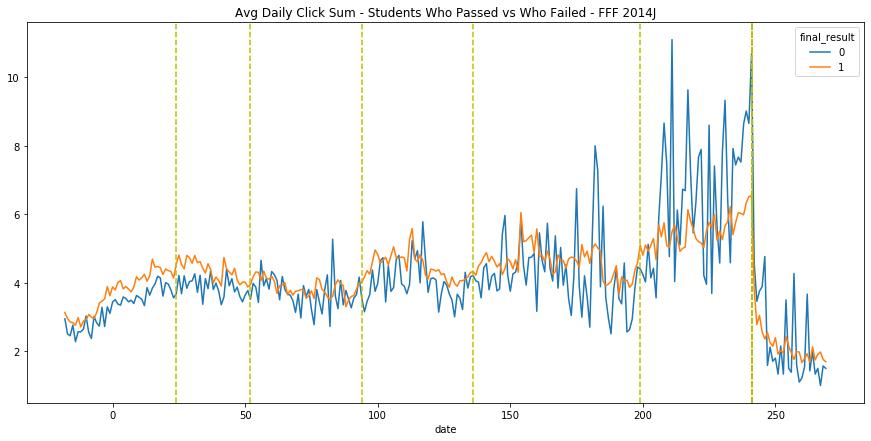

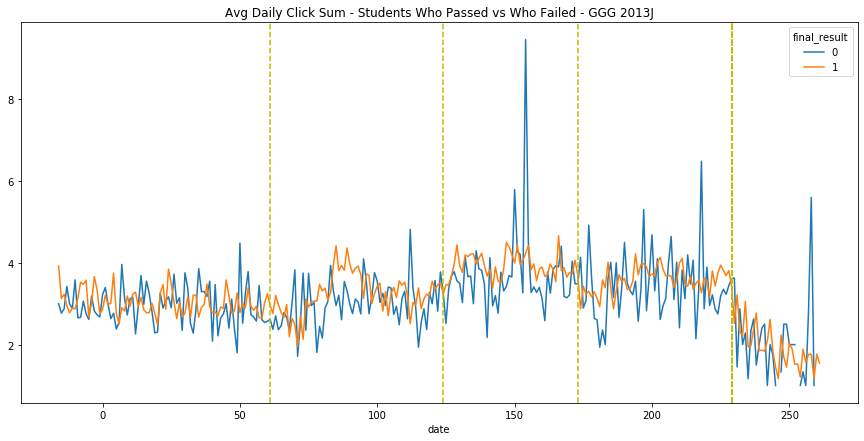

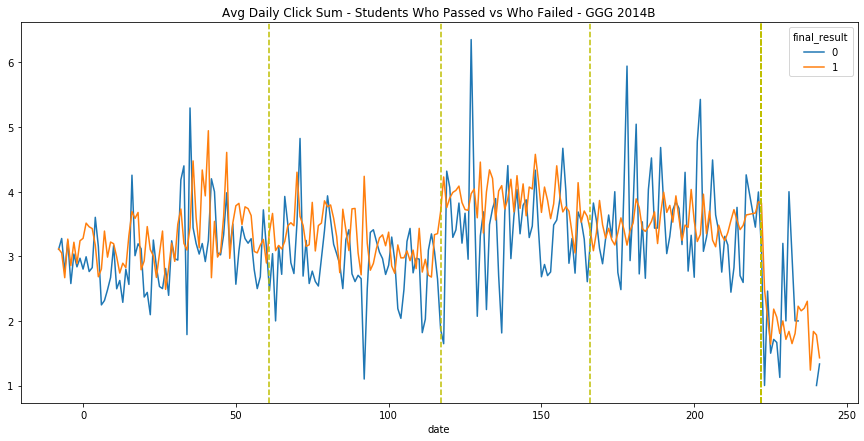

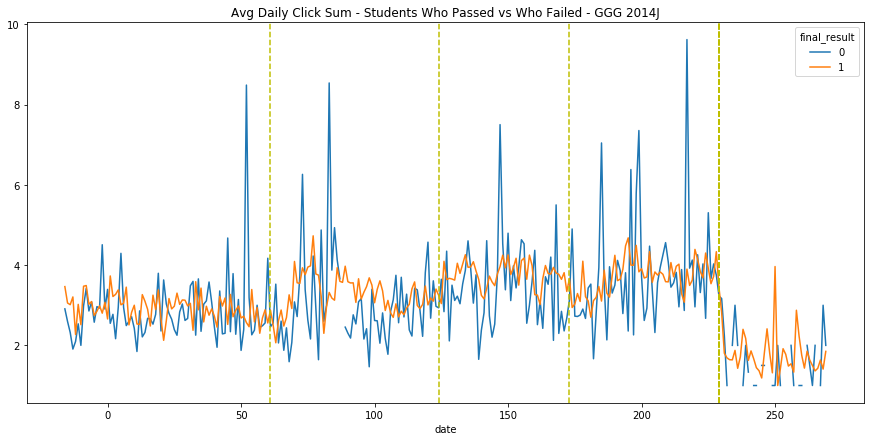

In [44]:
for mod, pres in courses:
    name = mod + " " + pres
    stvl_ = stu_vle[stu_vle.code_module.isin([mod])][stu_vle.code_presentation.isin([pres])]
    stin_ = stu_info[stu_info.code_module.isin([mod])][stu_info.code_presentation.isin([pres])]
    stvl_['final_result'] = stvl_['id_student'].map(stin_.set_index('id_student')['final_result'])
    stvl_.final_result.replace(to_replace=dict(Pass=1, Distinction=1, Fail=0, Withdrawn=0), inplace=True)
    as_ = ass[ass.code_module.isin([mod])][ass.code_presentation.isin([pres])]
    duedates = as_['date'].sort_values().dropna().values.tolist()
    plot_clk_sum_timeline(stvl_, duedates, name)